In [1]:
import pandas as pd
import numpy as np

In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
from h2o.estimators import H2OTargetEncoderEstimator

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /Users/tigran/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpxh_7j5ft
  JVM stdout: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpxh_7j5ft/h2o_tigran_started_from_python.out
  JVM stderr: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpxh_7j5ft/h2o_tigran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_tigran_hfgzke
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
train

id,obs_count,std,median,mean,skew,y
1,4360,5.46942,4,5.94005,1.84414,0
2,817,7.86008,5,7.56481,1.54397,0
3,845,12.9732,2,5.3481,8.24416,0
4,816,4.34378,2,2.80412,9.46799,0
5,283,5.58153,4,5.44231,2.44849,0
6,765,3.19309,2,3.47727,2.43963,0
7,11738,15.3828,6,11.032,4.0245,1
8,2702,7.88308,3,6.12698,3.26752,0
9,698,4.8149,2,3.40488,9.3068,0
10,1138,4.51945,3,4.42802,2.35055,0


In [7]:
test

id,obs_count,std,median,mean,skew
5093,41305,552.568,8,39.6021,32.0688
5094,28470,23.0461,14,18.4153,14.4607
5095,22968,54.7936,9,18.9505,26.2323
5096,21161,111.026,8,17.561,33.2785
5097,17803,66.5984,8,16.8111,28.0774
5098,16728,19.1211,7,12.9977,5.64288
5099,16247,23.8468,7,15.3854,3.67424
5100,15356,17.8554,7,12.7436,5.09743
5101,15104,9.04625,8,10.4816,1.73555
5102,14636,92.2579,6,13.4522,31.4264


In [8]:
train.types

{'id': 'int',
 'obs_count': 'int',
 'std': 'real',
 'median': 'real',
 'mean': 'real',
 'skew': 'real',
 'y': 'int'}

In [15]:
predictors = train.names

In [18]:
predictors

['id', 'obs_count', 'std', 'median', 'mean', 'skew', 'y']

In [17]:
train["y"]=train["y"].asfactor()

In [19]:
predictors.remove("y")
predictors.remove("id")

In [20]:
predictors

['obs_count', 'std', 'median', 'mean', 'skew']

In [21]:
response = "y" 

In [23]:
aml = H2OAutoML(max_models=15, seed=1090, nfolds=4,
                verbosity="info", sort_metric="AUCPR", exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |
21:13:12.734: Project: AutoML_2_20230328_211312
21:13:12.736: Setting stopping tolerance adaptively based on the training frame: 0.014013796366780263
21:13:12.736: Build control seed: 1090
21:13:12.737: training frame: Frame key: AutoML_2_20230328_211312_training_py_1_sid_a79b    cols: 7    rows: 5092  chunks: 32    size: 175903  checksum: -2060322167342150821
21:13:12.737: validation frame: NULL
21:13:12.737: leaderboard frame: NULL
21:13:12.737: blending frame: NULL
21:13:12.737: response column: y
21:13:12.737: fold column: null
21:13:12.737: weights column: null
21:13:12.738: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20230328_211312_model_3


Model Summary: 
    number_of_trees
--  -----------------
    42

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.00825736269279152
RMSE: 0.09087003187405361
LogLoss: 0.03186899594368874
Mean Per-Class Error: 0.14786660921249345
AUC: 0.9917409626001655
AUCPR: 0.8340664348633491
Gini: 0.9834819252003311

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2655763626098633
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      4979  14   0.0028   (14.0/4993.0)
1      29    70   0.2929   (29.0/99.0)
Total  5008  84   0.0084   (43.0/5092.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.265576     0.765027  77
max f2                       0.127423     0.792793  135
max f0point5                 0.360815     0.835735  58
max accuracy                 0.321925     0.991555  65
max precision                0.960265     1         0
max recall                   0.00980178   1         338
max specificity              0.960265     1         0
max absolute_mcc             0.265576     0.76342   77
max min_per_class_accuracy   0.0550729    0.95033   220
max mean_per_class_accuracy  0.0509906    0.962961  227
max tns                      0.960265     4993      0
max fns                      0.960265     98        0
max fps                      0.0002019    4993      399
max tps                      0.00980178   99        338
max tnr                      0.960265     1         0
max fnr                      0.960265     0.989899  0
max fpr                      0.0002019    1         399
max tpr                      0.00980178   1         338

Gains/Lift Table: Avg response rate:  1,94 %, avg score:  1,93 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100157                   0.50365            49.4173  49.4173            0.960784         0.680662     0.960784                    0.680662            0.494949        0.494949                   4841.73  4841.73            0.494549
2        0.0200314                   0.197282           23.1959  36.3066            0.45098          0.301062     0.705882                    0.490862            0.232323        0.727273                   2219.59  3530.66            0.721264
3        0.0300471                   0.132812           15.1277  29.247             0.294118         0.163451     0.568627                    0.381725            0.151515        0.878788                   1412.77  2824.7             0.865569
4        0.0400628                   0.0959429          5.04258  23.1959            0.0980392        0.111471     0.45098                     0.314161            0.0505051       0.929293                   404.258  2219.59            0.906862
5        0.0500786                   0.0771786          0        18.5567            0                0.0861421    0.360784                    0.268558            0               0.929293                   -100     1755.67            0.896647
6        0.100157                    0.0317312          1.21022  9.88346            0.0235294        0.0502744    0.192157                    0.159416            0.0606061       0.989899                   21.022   888.346            0.907383
7        0.150039                    0.0188803          0        6.5976             0          

In [24]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_2_20230328_211312_model_3,0.216572,0.889185,0.0738222,0.364694,0.130644,0.0170679
XRT_1_AutoML_2_20230328_211312,0.21191,0.833885,0.186092,0.368643,0.131359,0.0172551
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.210864,0.884763,0.0758528,0.359444,0.131475,0.0172856
StackedEnsemble_AllModels_1_AutoML_2_20230328_211312,0.208173,0.901745,0.0699177,0.364194,0.13013,0.0169339
GBM_4_AutoML_2_20230328_211312,0.207498,0.868838,0.0777206,0.375396,0.13183,0.0173792
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.203592,0.883706,0.0726989,0.372993,0.13051,0.0170329
DRF_1_AutoML_2_20230328_211312,0.198079,0.825272,0.189545,0.357297,0.133167,0.0177335
GBM_1_AutoML_2_20230328_211312,0.197015,0.902673,0.0697756,0.344693,0.130389,0.0170013
XGBoost_2_AutoML_2_20230328_211312,0.194814,0.903272,0.0708671,0.325549,0.131303,0.0172404
XGBoost_3_AutoML_2_20230328_211312,0.191602,0.884326,0.0766673,0.379345,0.133056,0.0177038


In [25]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_2_20230328_211312_model_3,0.216572,0.889185,0.0738222,0.364694,0.130644,0.0170679
XRT_1_AutoML_2_20230328_211312,0.21191,0.833885,0.186092,0.368643,0.131359,0.0172551
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.210864,0.884763,0.0758528,0.359444,0.131475,0.0172856
StackedEnsemble_AllModels_1_AutoML_2_20230328_211312,0.208173,0.901745,0.0699177,0.364194,0.13013,0.0169339
GBM_4_AutoML_2_20230328_211312,0.207498,0.868838,0.0777206,0.375396,0.13183,0.0173792
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.203592,0.883706,0.0726989,0.372993,0.13051,0.0170329
DRF_1_AutoML_2_20230328_211312,0.198079,0.825272,0.189545,0.357297,0.133167,0.0177335
GBM_1_AutoML_2_20230328_211312,0.197015,0.902673,0.0697756,0.344693,0.130389,0.0170013
XGBoost_2_AutoML_2_20230328_211312,0.194814,0.903272,0.0708671,0.325549,0.131303,0.0172404
XGBoost_3_AutoML_2_20230328_211312,0.191602,0.884326,0.0766673,0.379345,0.133056,0.0177038


In [26]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_2_20230328_211312_model_3,0.216572,0.889185,0.0738222,0.364694,0.130644,0.0170679
XRT_1_AutoML_2_20230328_211312,0.21191,0.833885,0.186092,0.368643,0.131359,0.0172551
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.210864,0.884763,0.0758528,0.359444,0.131475,0.0172856
StackedEnsemble_AllModels_1_AutoML_2_20230328_211312,0.208173,0.901745,0.0699177,0.364194,0.13013,0.0169339
GBM_4_AutoML_2_20230328_211312,0.207498,0.868838,0.0777206,0.375396,0.13183,0.0173792
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.203592,0.883706,0.0726989,0.372993,0.13051,0.0170329
DRF_1_AutoML_2_20230328_211312,0.198079,0.825272,0.189545,0.357297,0.133167,0.0177335
GBM_1_AutoML_2_20230328_211312,0.197015,0.902673,0.0697756,0.344693,0.130389,0.0170013
XGBoost_2_AutoML_2_20230328_211312,0.194814,0.903272,0.0708671,0.325549,0.131303,0.0172404
XGBoost_3_AutoML_2_20230328_211312,0.191602,0.884326,0.0766673,0.379345,0.133056,0.0177038


In [15]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmsle,rmse,mse,mae,mean_residual_deviance
DRF_1_AutoML_4_20230102_15227,0.214744,2.22513e+07,4.95119e+14,4.98802e+06,4.95119e+14
GBM_3_AutoML_4_20230102_15227,0.214899,2.13394e+07,4.55372e+14,5.23128e+06,4.55372e+14
GBM_2_AutoML_4_20230102_15227,0.219395,2.17143e+07,4.71509e+14,5.39582e+06,4.71509e+14
StackedEnsemble_AllModels_1_AutoML_4_20230102_15227,0.221435,2.0803e+07,4.32764e+14,5.31025e+06,4.32764e+14
GBM_5_AutoML_4_20230102_15227,0.22571,2.22595e+07,4.95483e+14,5.4938e+06,4.95483e+14
StackedEnsemble_BestOfFamily_1_AutoML_4_20230102_15227,0.225788,2.10144e+07,4.41604e+14,5.38547e+06,4.41604e+14
XRT_1_AutoML_4_20230102_15227,0.284986,2.30941e+07,5.33338e+14,6.04868e+06,5.33338e+14
DeepLearning_grid_3_AutoML_4_20230102_15227_model_1,0.399228,2.32401e+07,5.40103e+14,7.85685e+06,5.40103e+14
DeepLearning_grid_2_AutoML_4_20230102_15227_model_1,0.408292,2.24111e+07,5.02258e+14,7.78862e+06,5.02258e+14
GLM_1_AutoML_4_20230102_15227,1.06754,5.11821e+07,2.61961e+15,2.23124e+07,2.61961e+15


In [56]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_6_20230102_23328,2.06607e+07,4.26863e+14,4.82887e+06,0.19702,4.26863e+14
StackedEnsemble_BestOfFamily_1_AutoML_6_20230102_23328,2.08645e+07,4.35327e+14,5.05776e+06,0.208314,4.35327e+14
GBM_4_AutoML_6_20230102_23328,2.12607e+07,4.52019e+14,5.04251e+06,nan,4.52019e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_7,2.14005e+07,4.57983e+14,5.58861e+06,nan,4.57983e+14
GBM_3_AutoML_6_20230102_23328,2.14264e+07,4.59092e+14,5.23442e+06,nan,4.59092e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_2,2.14809e+07,4.61428e+14,5.28181e+06,nan,4.61428e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_8,2.17816e+07,4.74439e+14,4.93458e+06,0.203688,4.74439e+14
GBM_grid_1_AutoML_6_20230102_23328_model_8,2.17988e+07,4.75188e+14,4.87667e+06,nan,4.75188e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_1,2.2101e+07,4.88456e+14,5.85967e+06,nan,4.88456e+14
GBM_5_AutoML_6_20230102_23328,2.2189e+07,4.9235e+14,5.46459e+06,nan,4.9235e+14


In [27]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_2_20230328_211312_model_3,0.216572,0.889185,0.0738222,0.364694,0.130644,0.0170679
XRT_1_AutoML_2_20230328_211312,0.21191,0.833885,0.186092,0.368643,0.131359,0.0172551
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.210864,0.884763,0.0758528,0.359444,0.131475,0.0172856
StackedEnsemble_AllModels_1_AutoML_2_20230328_211312,0.208173,0.901745,0.0699177,0.364194,0.13013,0.0169339
GBM_4_AutoML_2_20230328_211312,0.207498,0.868838,0.0777206,0.375396,0.13183,0.0173792
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.203592,0.883706,0.0726989,0.372993,0.13051,0.0170329
DRF_1_AutoML_2_20230328_211312,0.198079,0.825272,0.189545,0.357297,0.133167,0.0177335
GBM_1_AutoML_2_20230328_211312,0.197015,0.902673,0.0697756,0.344693,0.130389,0.0170013
XGBoost_2_AutoML_2_20230328_211312,0.194814,0.903272,0.0708671,0.325549,0.131303,0.0172404
XGBoost_3_AutoML_2_20230328_211312,0.191602,0.884326,0.0766673,0.379345,0.133056,0.0177038


In [28]:
aml.leader

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20230328_211312_model_3


Model Summary: 
    number_of_trees
--  -----------------
    42

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.00825736269279152
RMSE: 0.09087003187405361
LogLoss: 0.03186899594368874
Mean Per-Class Error: 0.14786660921249345
AUC: 0.9917409626001655
AUCPR: 0.8340664348633491
Gini: 0.9834819252003311

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2655763626098633
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      4979  14   0.0028   (14.0/4993.0)
1      29    70   0.2929   (29.0/99.0)
Total  5008  84   0.0084   (43.0/5092.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.265576     0.765027  77
max f2                       0.127423     0.792793  135
max f0point5                 0.360815     0.835735  58
max accuracy                 0.321925     0.991555  65
max precision                0.960265     1         0
max recall                   0.00980178   1         338
max specificity              0.960265     1         0
max absolute_mcc             0.265576     0.76342   77
max min_per_class_accuracy   0.0550729    0.95033   220
max mean_per_class_accuracy  0.0509906    0.962961  227
max tns                      0.960265     4993      0
max fns                      0.960265     98        0
max fps                      0.0002019    4993      399
max tps                      0.00980178   99        338
max tnr                      0.960265     1         0
max fnr                      0.960265     0.989899  0
max fpr                      0.0002019    1         399
max tpr                      0.00980178   1         338

Gains/Lift Table: Avg response rate:  1,94 %, avg score:  1,93 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100157                   0.50365            49.4173  49.4173            0.960784         0.680662     0.960784                    0.680662            0.494949        0.494949                   4841.73  4841.73            0.494549
2        0.0200314                   0.197282           23.1959  36.3066            0.45098          0.301062     0.705882                    0.490862            0.232323        0.727273                   2219.59  3530.66            0.721264
3        0.0300471                   0.132812           15.1277  29.247             0.294118         0.163451     0.568627                    0.381725            0.151515        0.878788                   1412.77  2824.7             0.865569
4        0.0400628                   0.0959429          5.04258  23.1959            0.0980392        0.111471     0.45098                     0.314161            0.0505051       0.929293                   404.258  2219.59            0.906862
5        0.0500786                   0.0771786          0        18.5567            0                0.0861421    0.360784                    0.268558            0               0.929293                   -100     1755.67            0.896647
6        0.100157                    0.0317312          1.21022  9.88346            0.0235294        0.0502744    0.192157                    0.159416            0.0606061       0.989899                   21.022   888.346            0.907383
7        0.150039                    0.0188803          0        6.5976             0          

In [29]:
preds = aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [30]:
preds2 = h2o.get_model("XGBoost_grid_1_AutoML_2_20230328_211312_model_3").predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [31]:
preds = preds2

In [32]:
answer = h2o.import_file("sample_submission.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [33]:
temp = preds["predict"]

In [34]:
temp = temp.as_data_frame()
temp = np.expm1(temp)
temp = h2o.H2OFrame(temp)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [35]:
answer["Price"] = temp

In [36]:
answer["Price"] = answer["Price"] + 1

In [37]:
h2o.export_file(answer, path = "hospital.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XRT_1_AutoML_2_20230328_211312,1,0.0141467,1,0,0.0501945,0.00251949,337,0.005521,DRF
DRF_1_AutoML_2_20230328_211312,1,0.0145519,1,0,0.0520561,0.00270984,265,0.00479,DRF
GBM_grid_1_AutoML_2_20230328_211312_model_1,0.999939,0.0151381,0.996853,0.000400561,0.0552944,0.00305748,183,0.007107,GBM
GBM_grid_1_AutoML_2_20230328_211312_model_2,0.999887,0.012995,0.99391,0.00525079,0.0505814,0.00255847,251,0.006348,GBM
XGBoost_grid_1_AutoML_2_20230328_211312_model_1,0.999524,0.0192676,0.981451,0.0506052,0.0666139,0.00443741,341,0.005752,XGBoost
GBM_4_AutoML_2_20230328_211312,0.998897,0.0250774,0.949322,0.0470568,0.0789069,0.0062263,177,0.007416,GBM
GBM_5_AutoML_2_20230328_211312,0.998338,0.0224186,0.97612,0.0506052,0.0710166,0.00504336,199,0.005074,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.996215,0.0365465,0.892736,0.073511,0.0971293,0.0094341,4027,0.023171,StackedEnsemble
GBM_3_AutoML_2_20230328_211312,0.99566,0.0319437,0.8681,0.137465,0.0911777,0.00831338,185,0.005435,GBM
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.992905,0.0299561,0.878149,0.107062,0.087337,0.00762775,258,0.015372,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_2_20230328_211312_model_3

,0,1,Error,Rate
0,4979.0,14.0,0.0028,(14.0/4993.0)
1,29.0,70.0,0.2929,(29.0/99.0)
Total,5008.0,84.0,0.0084,(43.0/5092.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

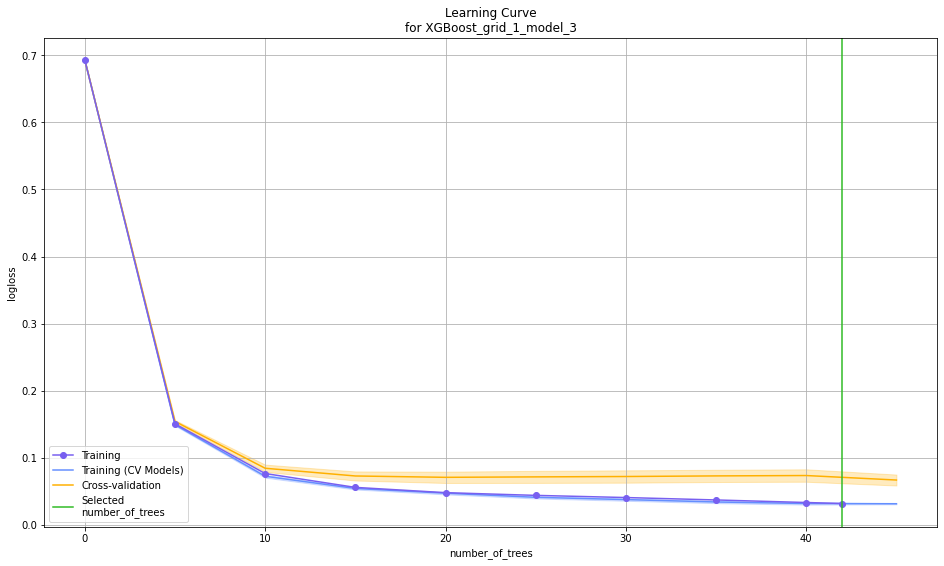

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

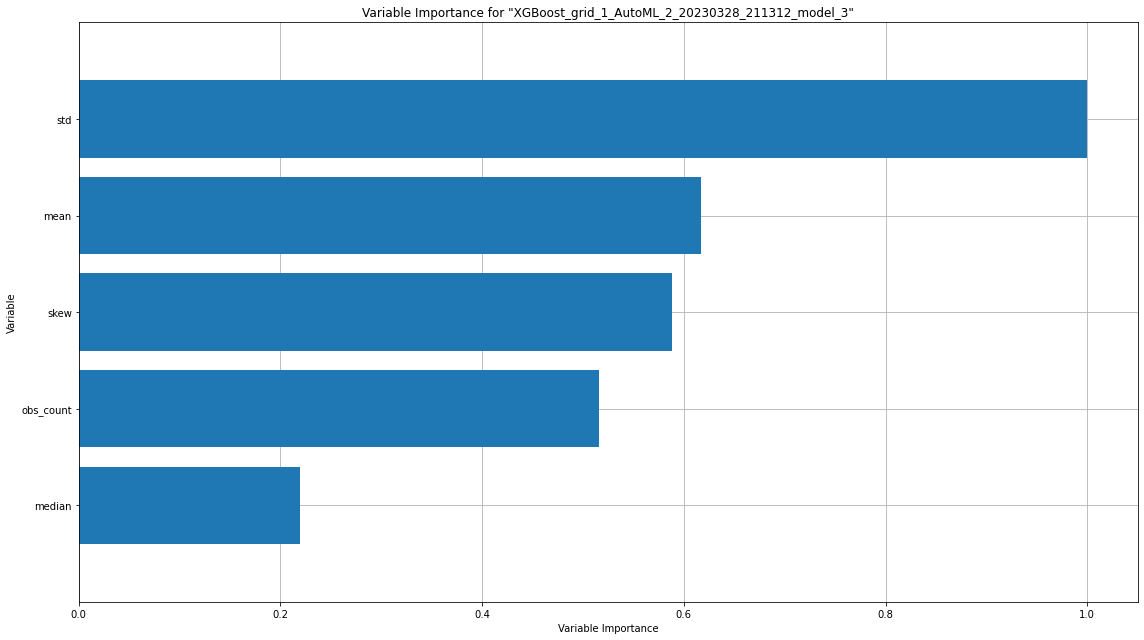

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

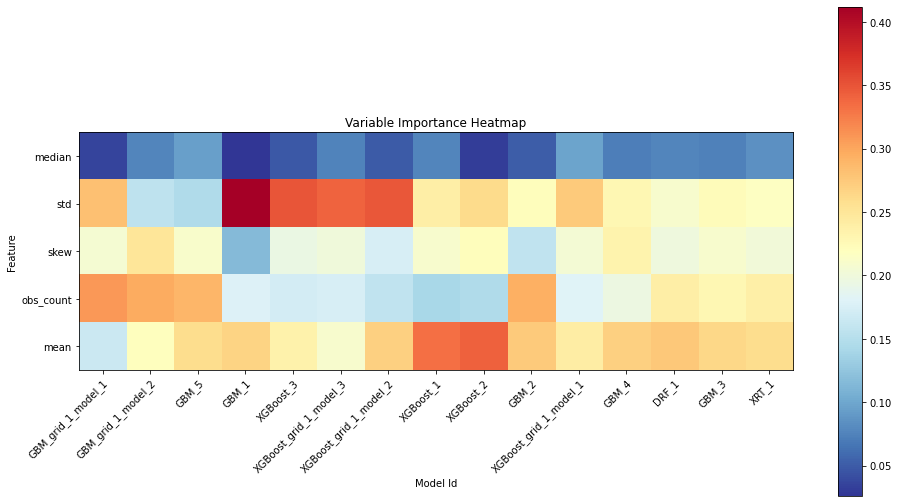

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

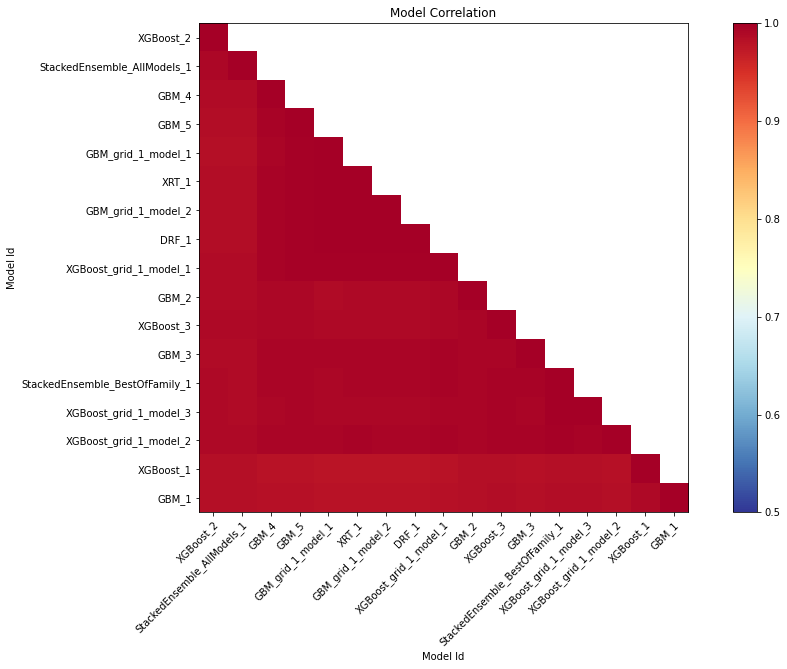

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

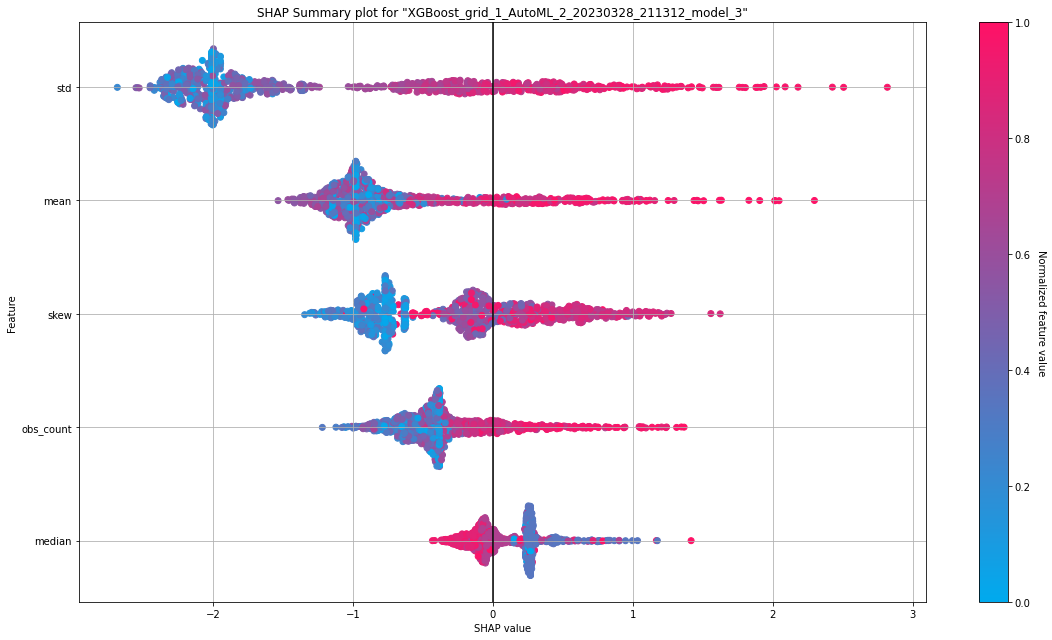

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

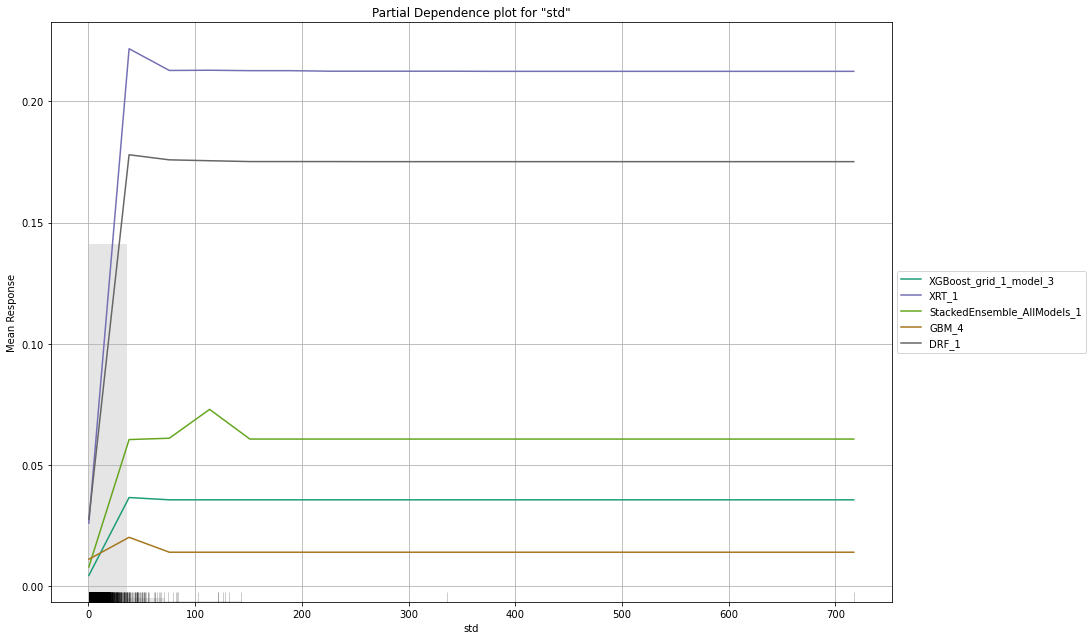

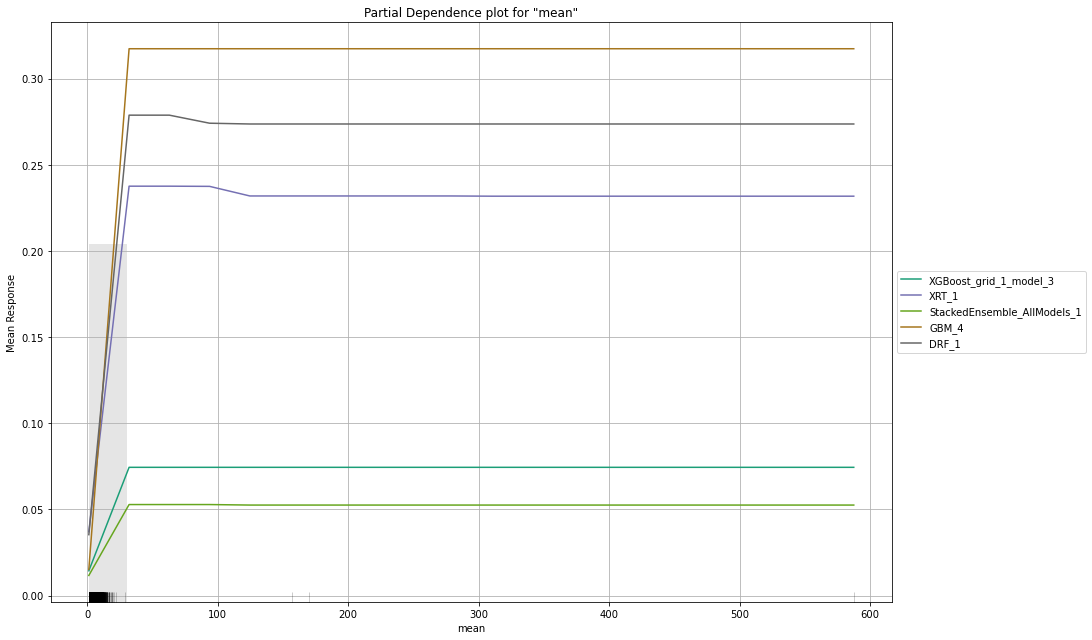

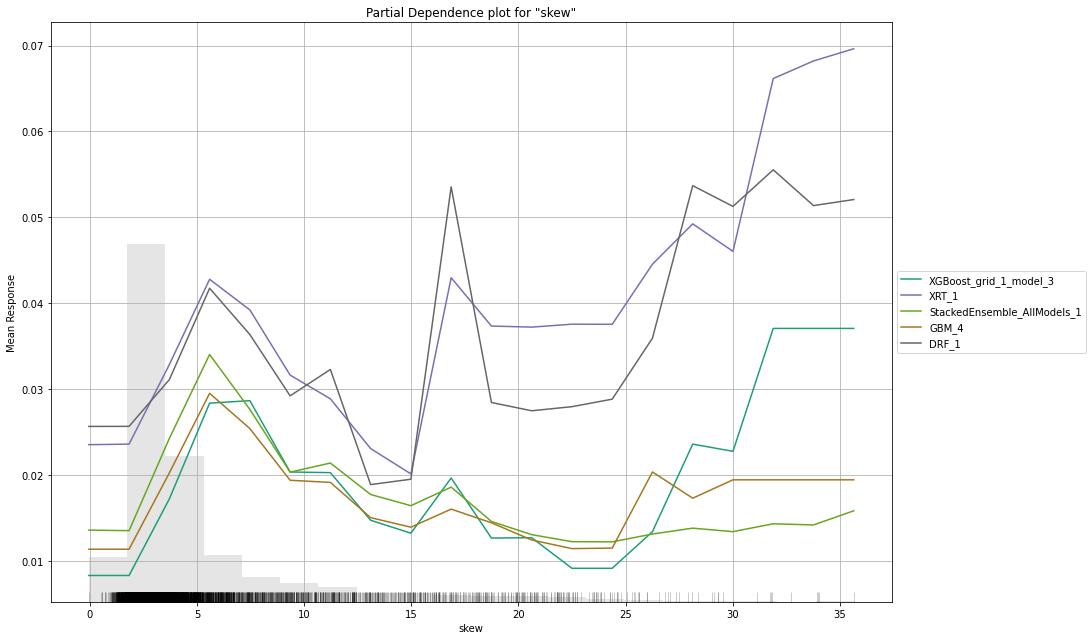

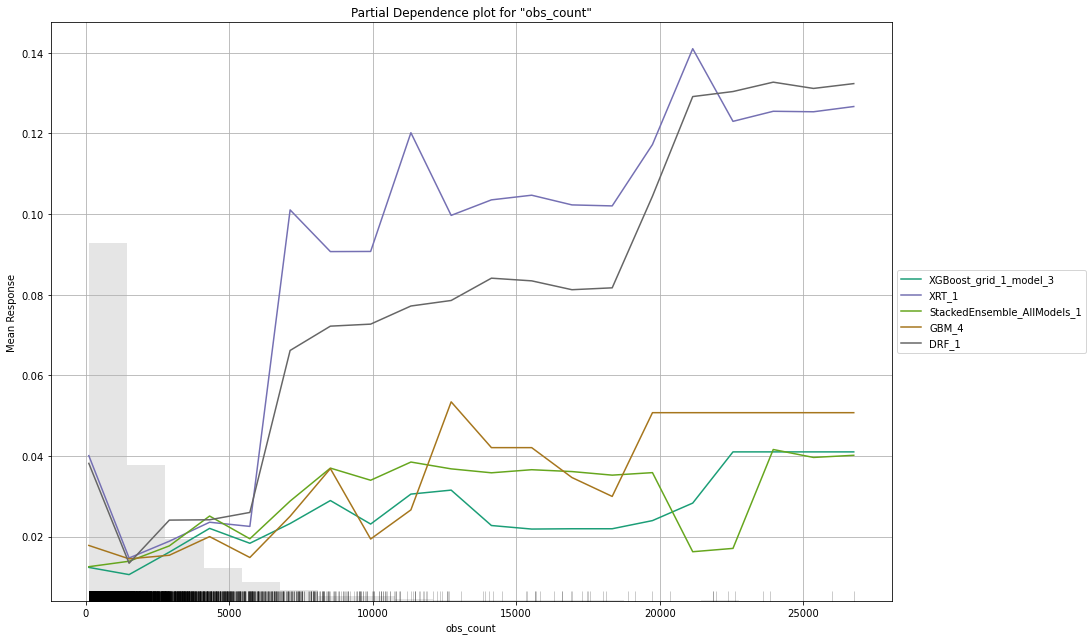

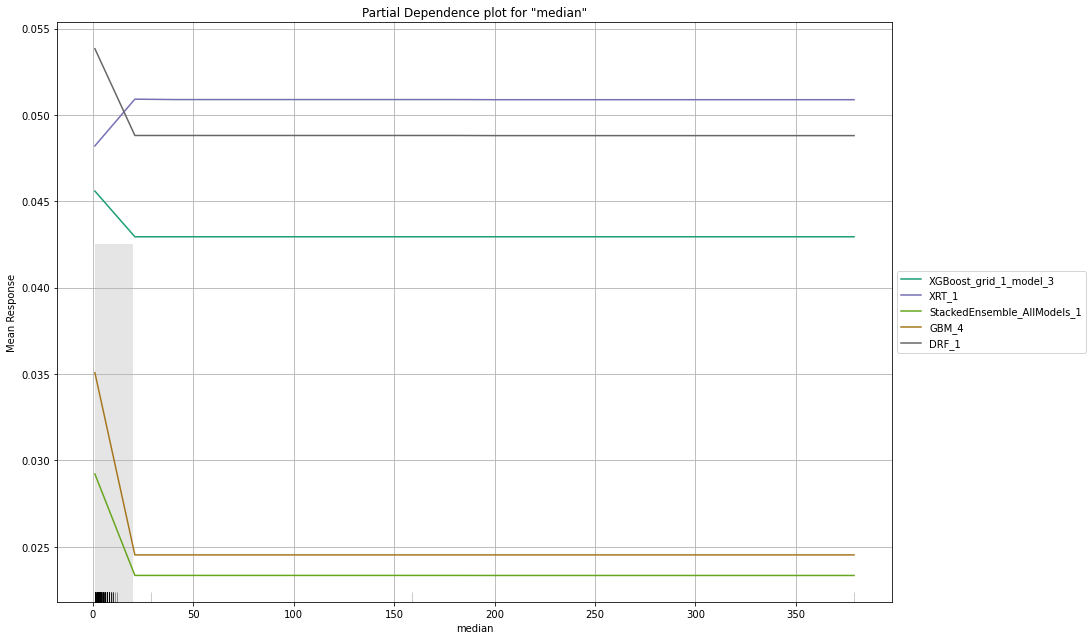

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XRT_1_AutoML_2_20230328_211312,1,0.0141467,1,0,0.0501945,0.00251949,337,0.005521,DRF
DRF_1_AutoML_2_20230328_211312,1,0.0145519,1,0,0.0520561,0.00270984,265,0.00479,DRF
GBM_grid_1_AutoML_2_20230328_211312_model_1,0.999939,0.0151381,0.996853,0.000400561,0.0552944,0.00305748,183,0.007107,GBM
GBM_grid_1_AutoML_2_20230328_211312_model_2,0.999887,0.012995,0.99391,0.00525079,0.0505814,0.00255847,251,0.006348,GBM
XGBoost_grid_1_AutoML_2_20230328_211312_model_1,0.999524,0.0192676,0.981451,0.0506052,0.0666139,0.00443741,341,0.005752,XGBoost
GBM_4_AutoML_2_20230328_211312,0.998897,0.0250774,0.949322,0.0470568,0.0789069,0.0062263,177,0.007416,GBM
GBM_5_AutoML_2_20230328_211312,0.998338,0.0224186,0.97612,0.0506052,0.0710166,0.00504336,199,0.005074,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_211312,0.996215,0.0365465,0.892736,0.073511,0.0971293,0.0094341,4027,0.023171,StackedEnsemble
GBM_3_AutoML_2_20230328_211312,0.99566,0.0319437,0.8681,0.137465,0.0911777,0.00831338,185,0.005435,GBM
XGBoost_grid_1_AutoML_2_20230328_211312_model_2,0.992905,0.0299561,0.878149,0.107062,0.087337,0.00762775,258,0.015372,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_2_20230328_211312_model_3

,0,1,Error,Rate
0,4979.0,14.0,0.0028,(14.0/4993.0)
1,29.0,70.0,0.2929,(29.0/99.0)
Total,5008.0,84.0,0.0084,(43.0/5092.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [38]:
aml.explain(train)